In [54]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
%matplotlib inline
import seaborn as sns

# bike 데이터

In [28]:
bike=pd.read_csv('bike.csv',encoding='euc-kr')
bike

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0000,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0000,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0000,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0000,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0000,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...
10881,2012-12-19 19:00:00,4,0,1,1,15.58,19.695,50,26.0027,7,329,336
10882,2012-12-19 20:00:00,4,0,1,1,14.76,17.425,57,15.0013,10,231,241
10883,2012-12-19 21:00:00,4,0,1,1,13.94,15.910,61,15.0013,4,164,168
10884,2012-12-19 22:00:00,4,0,1,1,13.94,17.425,61,6.0032,12,117,129


In [29]:
# 컬럼명만 가져오기
bike.columns

Index(['datetime', 'season', 'holiday', 'workingday', 'weather', 'temp',
       'atemp', 'humidity', 'windspeed', 'casual', 'registered', 'count'],
      dtype='object')

In [30]:
#datatime을 날짜로 인식
bike['datetime']= pd.to_datetime(bike['datetime'])

In [31]:
bike.head(6)

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0000,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0000,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0000,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0000,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0000,0,1,1
5,2011-01-01 05:00:00,1,0,0,2,9.84,12.880,75,6.0032,0,1,1


In [32]:
bike.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   datetime    10886 non-null  datetime64[ns]
 1   season      10886 non-null  int64         
 2   holiday     10886 non-null  int64         
 3   workingday  10886 non-null  int64         
 4   weather     10886 non-null  int64         
 5   temp        10886 non-null  float64       
 6   atemp       10886 non-null  float64       
 7   humidity    10886 non-null  int64         
 8   windspeed   10886 non-null  float64       
 9   casual      10886 non-null  int64         
 10  registered  10886 non-null  int64         
 11  count       10886 non-null  int64         
dtypes: datetime64[ns](1), float64(3), int64(8)
memory usage: 1020.7 KB


In [41]:
# datetime 으로 날짜로 인식하게 하고 날짜랑 시간을 나눠서 컬럼에 추가
bike['year']=bike['datetime'].dt.year
bike['month']=bike['datetime'].dt.month
bike['day']=bike['datetime'].dt.day
bike['hour']=bike['datetime'].dt.hour
bike['minute']=bike['datetime'].dt.minute
bike['second']=bike['datetime'].dt.second


# dayofweek 는 요일을 가져오는 말
#월(0) 화(1) 수(2) 목(3) 금(4) 토(5) 일(6)
bike['dayofweek'] = bike['datetime'].dt.dayofweek

In [42]:
bike.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,year,montr,day,hour,minute,second,dayofweek,month
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16,2011,1,1,0,0,0,5,1
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40,2011,1,1,1,0,0,5,1
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32,2011,1,1,2,0,0,5,1
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13,2011,1,1,3,0,0,5,1
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1,2011,1,1,4,0,0,5,1


<AxesSubplot:xlabel='year', ylabel='month'>

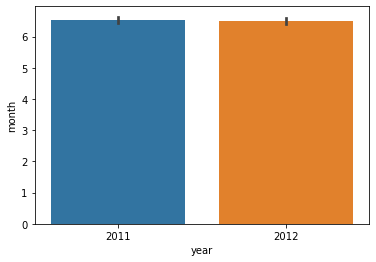

In [43]:
#year 별 자전거 수요량
#month별 자전거 수요량
#day 별 자전거 수요량
#season 별 자전거 수요량
sns.barplot(data=bike, x ='year', y='month')

<AxesSubplot:xlabel='month', ylabel='year'>

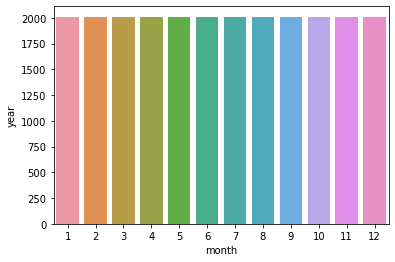

In [44]:
sns.barplot(data=bike, x ='month', y='year')

<AxesSubplot:xlabel='day', ylabel='count'>

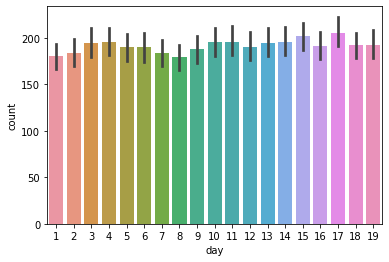

In [46]:
sns.barplot(data=bike, x ='day', y='count')

<AxesSubplot:xlabel='season', ylabel='count'>

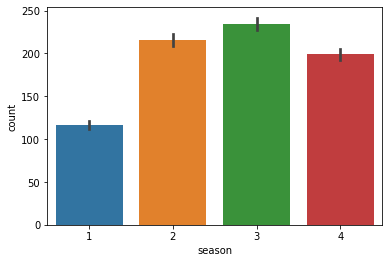

In [45]:
sns.barplot(data=bike, x ='season', y='count')

<AxesSubplot:xlabel='hour', ylabel='count'>

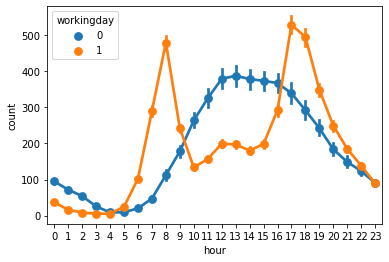

In [47]:
# 시간대별 pointpolt
sns.pointplot(data=bike,x='hour', y = 'count', hue='workingday')

<AxesSubplot:xlabel='hour', ylabel='count'>

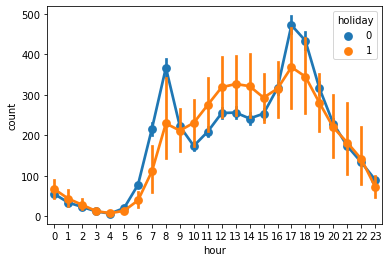

In [48]:
sns.pointplot(data=bike,x='hour', y = 'count', hue='holiday')

<AxesSubplot:xlabel='hour', ylabel='count'>

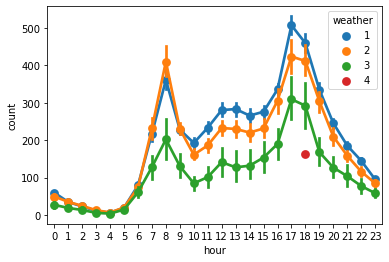

In [49]:
sns.pointplot(data=bike,x='hour', y = 'count', hue='weather')

<AxesSubplot:xlabel='humidity', ylabel='count'>

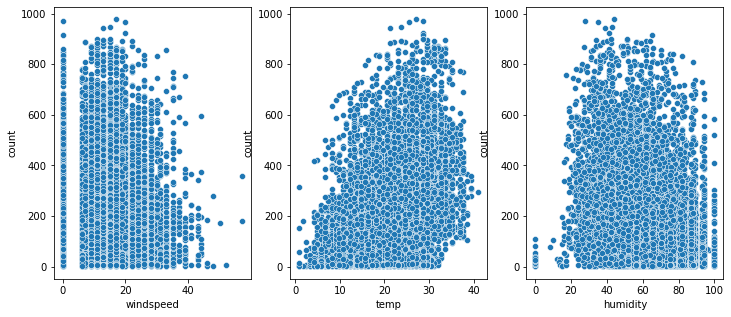

In [53]:
# 온도, 습도, 바람세기
fig, (ax1,ax2,ax3) = plt.subplots(ncols=3, figsize=(12,5))

sns.scatterplot(data=bike, x='windspeed', y='count',ax=ax1)
sns.scatterplot(data=bike, x='temp', y='count',ax=ax2)
sns.scatterplot(data=bike, x='humidity', y='count',ax=ax3)

In [55]:
len(bike[bike['windspeed']==0])

1313

<AxesSubplot:xlabel='temp'>

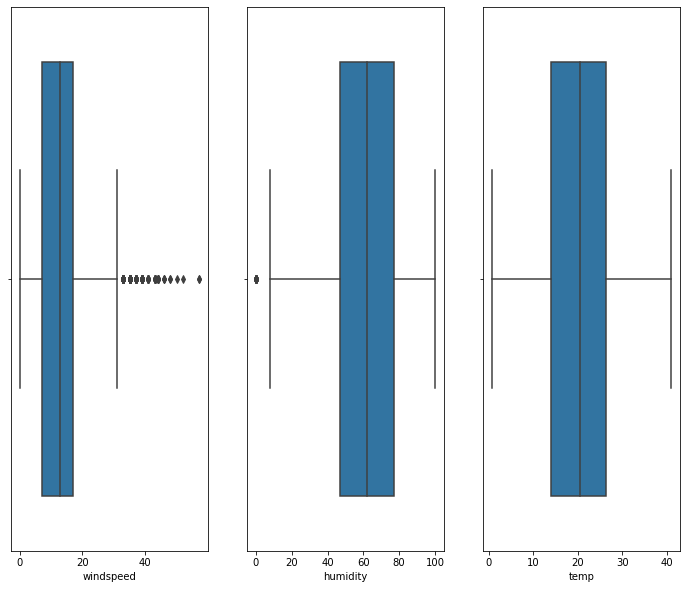

In [68]:
#이상치 확인
#temp 칼러부터 count칼럼까지 각각 boxplot 그리기
#단, 3개의 boxplot을 한번에 출력

fig, (ax1,ax2,ax3) = plt.subplots(ncols=3, figsize=(12,10))

sns.boxplot(data=bike, x='windspeed',ax=ax1)
sns.boxplot(data=bike, x='humidity',ax=ax2)
sns.boxplot(data=bike, x='temp',ax=ax3)

In [61]:
bike[bike['windspeed']==0.0]

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,year,montr,day,hour,minute,second,dayofweek,month
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16,2011,1,1,0,0,0,5,1
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40,2011,1,1,1,0,0,5,1
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32,2011,1,1,2,0,0,5,1
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13,2011,1,1,3,0,0,5,1
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1,2011,1,1,4,0,0,5,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10826,2012-12-17 12:00:00,4,0,1,2,16.40,20.455,87,0.0,21,211,232,2012,12,17,12,0,0,0,12
10829,2012-12-17 15:00:00,4,0,1,2,17.22,21.210,88,0.0,15,196,211,2012,12,17,15,0,0,0,12
10846,2012-12-18 08:00:00,4,0,1,1,15.58,19.695,94,0.0,10,652,662,2012,12,18,8,0,0,1,12
10860,2012-12-18 22:00:00,4,0,1,1,13.94,16.665,49,0.0,5,127,132,2012,12,18,22,0,0,1,12


# suv 데이터

In [62]:
suv=pd.read_csv('suv.csv', encoding='utf-8')
suv.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [63]:
suv.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   User ID          400 non-null    int64 
 1   Gender           400 non-null    object
 2   Age              400 non-null    int64 
 3   EstimatedSalary  400 non-null    int64 
 4   Purchased        400 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 15.8+ KB


In [67]:
#pd.get_dummies: 결측값 제외하고 0,1로 구성된 더미값ㅇ르 만들어줌
#dummy_na=True: nan을 생성 -> 결측값도 인코딩해서 처리해줌
suv2 = pd.get_dummies(suv,columns=['Gender'],dummy_na=True)
suv2.head()

,User ID,Age,EstimatedSalary,Purchased,Gender_Female,Gender_Male,Gender_nan
0,15624510,19,19000,0,0,1,0
1,15810944,35,20000,0,0,1,0
2,15668575,26,43000,0,1,0,0
3,15603246,27,57000,0,1,0,0
4,15804002,19,76000,0,0,1,0


C:\Users\user\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Age', ylabel='Density'>

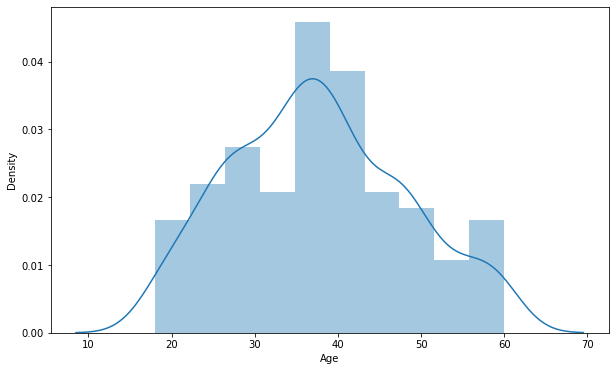

In [71]:
#age 변수 분포 확인
f,ax=plt.subplots(figsize=(10,6))
sns.distplot(suv2['Age'])      #정규분포